In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [3]:
# função para traçar reta no plano cartesiano (x2 = f(x1))
def coord(w0,w1,w2,x1):
  if w2 != 0:
    return (-w0-w1*x1)/w2
  else:
    return 2000 # Inf

In [4]:
# dataset Iris
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa e versicolor     // 100
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# seleciona somente duas features (colunas) de entrada: comps sepal e petal [0,2]  // 100
X = df.iloc[0:150, [2,3]].values

In [5]:
# base
# classe Neuronio e aprendizado estocastico/online

class Neuronio(object):

    def __init__(self, eta=0.1, epocas=50, fativ='perceptron',showErro=False):
        self.eta = eta
        self.epocas = epocas
        self.w_ = np.random.rand(1 + X.shape[1]) - 0.5
        self.fativ = fativ
        self.showErro = showErro
        self.erro_ep = 0
        self.SqError_ = []

    def somat(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def sinal(self, x):
        return np.where(x >= 0.0, 1, -1)

    def tanh(self, x):
      return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

    def d_tanh(self, x):
      return 1 - self.tanh(x) * self.tanh(x)

    def ReLU(self, x):
      return np.where(x > 0.0, x, 0.1*x)  #max(0, x) .... float

    def d_ReLU(self, x):
      return np.where(x > 0.0, 1, 0.1)

    def predict(self,X):
      if self.fativ == 'sinal' or self.fativ == 'perceptron':
#        print(f"sinalPredict={self.sinal(self.somat(X))}")  # debug
        return self.sinal(self.somat(X))
      elif self.fativ == 'linear':
        return self.somat(X)
      elif self.fativ == 'tanh':
        return self.tanh(self.somat(X))
      elif self.fativ == 'ReLU':
        return self.ReLU(self.somat(X))
      else:
        return 11

    def deltaW(self, erro):
      if self.fativ == 'sinal' or self.fativ == 'perceptron':
        atualiza = self.eta * erro
      elif self.fativ == 'linear':
        atualiza = self.eta * erro
      elif self.fativ == 'tanh':
#        print(f"> eta={self.eta} tanh={self.tanh(erro)} dtanh={self.d_tanh(erro)} erro={erro}")
        atualiza = self.eta * self.d_tanh(erro) * erro
      elif self.fativ == 'ReLU':
        atualiza = self.eta * self.d_ReLU(erro) * erro
      else:
        print(f"Função de ativação '{self.fativ}' desconhecida")
        exit()
      return atualiza

    def treinaGD(self,X,y):
      self.SqError_ = []
      self.erros_classif_ = []
      for ep in range(self.epocas):
        erro_classif = 0
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        Xs = X[indices]
        ys = y[indices]
        outputs = self.predict(Xs)
        erros = (ys - outputs)
       # print(outputs,erros)
        erro_classif = np.where(ys*outputs < 0, 1, 0).sum()
        self.erros_classif_.append(erro_classif)
        self.w_[1:] += self.eta * Xs.T.dot(erros)
        self.w_[0] += self.eta * erros.sum()
        SqError = (erros**2).sum() / 2.0 # ou np.square(erros)/2
        self.SqError_.append(SqError)
        if self.showErro:
          if ep == 0:
            print(f"{'Época':^10}\tErro")
          else:
            print(f"{str(ep):^10}\t{erro_classif}")
      return self

    def treinaSGD(self, X, y):
        self.erros_ = []
        self.erros_classif_ = []
        self.SqError_ = []
        for ep in range(self.epocas):
            erro_ep = 0
            erro_classif = 0
            SqError = 0

            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            Xs = X[indices]
            ys = y[indices]

            for xi, target in zip(Xs, ys):
              output = self.predict(xi)
              erro = target - output
              SqError += erro*erro
              erro_ep += erro
              if (float(target)*float(output)) < 0:
                #print(f"ep={ep} {xi} target={target} output={output} t*o={target*output}") # debug
                erro_classif += 1

              atualizacao = self.deltaW(erro)
              self.w_[0] +=  atualizacao * 1
              self.w_[1:] +=  atualizacao * xi

            self.erros_.append(erro_ep)
            self.SqError_.append(SqError)
            self.erros_classif_.append(erro_classif)
            if self.showErro:
              if ep == 0:
                print(f"{'Época':^10}\tErro")
              else:
                print(f"{str(ep):^10}\t{erro_classif}")

        return self

In [6]:
# cria objeto

np.random.seed(35)  # deixar reproduzível

classifier = Neuronio(fativ='linear', eta=0.00002, epocas=1000,showErro=True)

W0 = classifier.w_.copy()

In [7]:
# treinamento
classifier.treinaGD(X,y)

  Época   	Erro
    1     	100
    2     	100
    3     	100
    4     	100
    5     	100
    6     	100
    7     	100
    8     	100
    9     	100
    10    	100
    11    	100
    12    	100
    13    	107
    14    	131
    15    	140
    16    	130
    17    	89
    18    	61
    19    	51
    20    	50
    21    	50
    22    	50
    23    	50
    24    	50
    25    	50
    26    	50
    27    	50
    28    	50
    29    	50
    30    	50
    31    	50
    32    	50
    33    	50
    34    	50
    35    	50
    36    	50
    37    	50
    38    	50
    39    	50
    40    	50
    41    	50
    42    	50
    43    	50
    44    	50
    45    	50
    46    	50
    47    	50
    48    	50
    49    	50
    50    	50
    51    	50
    52    	50
    53    	50
    54    	50
    55    	50
    56    	50
    57    	50
    58    	50
    59    	50
    60    	50
    61    	50
    62    	50
    63    	50
    64    	50
    65    	50
    66    	50
    67    	50
    68    	50
    69    	50
  

Text(0, 0.5, 'Erros de classificação por época')

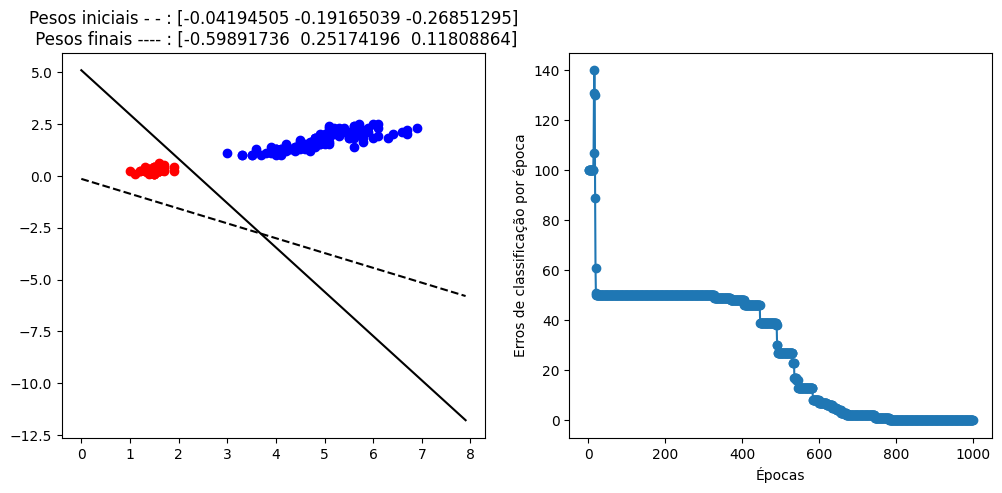

In [8]:
# base
rna = classifier
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]
ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

# mostra o classificador antes e depois do treinamento
titulo = f'Pesos iniciais - - : {W0}\n Pesos finais ---- : {rna.w_}'
ax1.set_title(titulo)
ax1.ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
ax1.scatter(x1,y1, color='blue')
ax1.scatter(x0,y0,color='red')
ax1.plot(ylim,coord(W0[0],W0[1],W0[2], x),color='black',linestyle='dashed')
ax1.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')

ax2.plot(range(1, len(rna.erros_classif_)+1), rna.erros_classif_, marker='o')
#ax2.plot(range(1, len(rna.SqErrors_)+1), rna.SqError_, marker='o')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Erros de classificação por época')

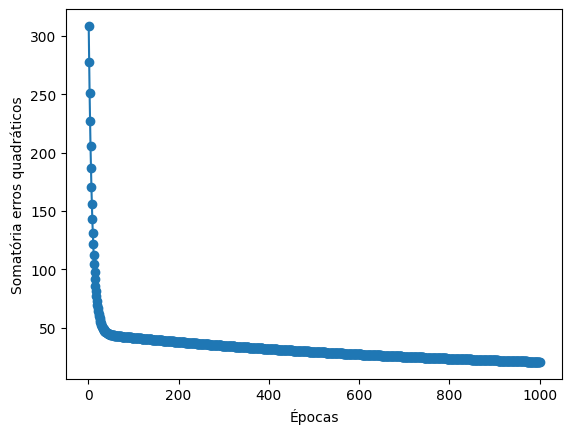

In [9]:
# evolução do custo
plt.plot(range(1, len(rna.SqError_)+1), rna.SqError_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Somatória erros quadráticos')
plt.show()

In [10]:
# separando datasets de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=102)

In [11]:
# cria objeto

np.random.seed(35)  # deixar reproduzível

classifier2 = Neuronio(fativ='linear', eta=0.00002, epocas=1000,showErro=False)

W0 = classifier2.w_.copy()

In [12]:
# treinamento
%time classifier2.treinaGD(X_train,y_train)

CPU times: total: 31.2 ms
Wall time: 33.8 ms


In [13]:
# calcula previsões - e compara com target
preds = classifier2.predict(X_test)
PercClassifica = 100 * np.where(preds*y_test < 0, 0, 1).sum() / len(y_test)
PercClassifica

100.0

In [14]:
categ_preds = np.where(preds < 0, -1, 1)
cm = confusion_matrix(y_test, categ_preds)
print(cm)
accuracy_score(y_test,categ_preds)

[[11  0]
 [ 0 19]]


1.0

Text(0, 0.5, 'Erros de classificação por época')

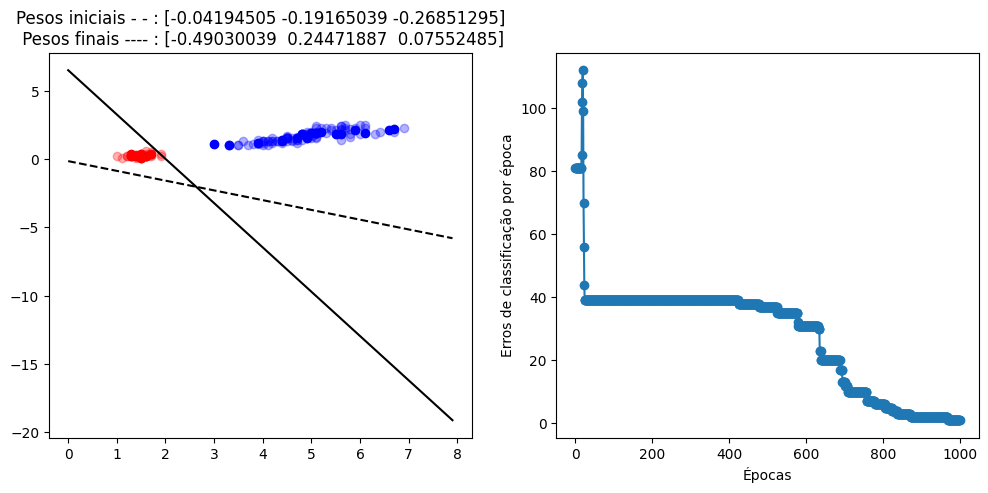

In [15]:
# base
rna = classifier2
xr1, yr1 = X_train[y_train==1,0],X_train[y_train==1,1]
xr0, yr0 = X_train[y_train==-1,0], X_train[y_train==-1,1]

xs1, ys1 = X_test[y_test==1,0],X_test[y_test==1,1]
xs0, ys0 = X_test[y_test==-1,0], X_test[y_test==-1,1]

ylim = [min(min(xr1), min(xs1) , min(xr0),min(xs0))-1, max(max(xr0),max(xs0) , max(xr1),max(xs1))+1]
x = np.linspace(ylim[0], ylim[1], 2)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

# mostra o classificador antes e depois do treinamento
titulo = f'Pesos iniciais - - : {W0}\n Pesos finais ---- : {rna.w_}'
ax1.set_title(titulo)
ax1.ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
ax1.scatter(xr1,yr1, color='blue',alpha=0.3)
ax1.scatter(xr0,yr0,color='red',alpha=0.3)
ax1.scatter(xs1,ys1, color='blue')
ax1.scatter(xs0,ys0,color='red')
ax1.plot(ylim,coord(W0[0],W0[1],W0[2], x),color='black',linestyle='dashed')
ax1.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')

ax2.plot(range(1, len(rna.erros_classif_)+1), rna.erros_classif_, marker='o')
#ax2.plot(range(1, len(rna.SqErrors_)+1), rna.SqError_, marker='o')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Erros de classificação por época')

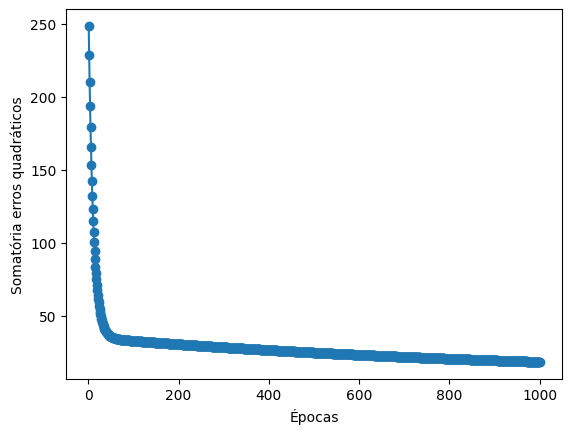

In [16]:
# evolução do custo
plt.plot(range(1, len(rna.SqError_)+1), rna.SqError_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Somatória erros quadráticos')
plt.show()